In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [4]:
df['heart disease'].value_countss()

0    150
1    120
Name: heart disease, dtype: int64

In [6]:
X = df.drop('heart disease',axis=1)
y = df['heart disease']

## Train-test split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=42,train_size=0.7)
X_train.shape,X_test.shape

((189, 4), (81, 4))

### Building the decision tree model

In [8]:
#Use all default parameters except depth
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

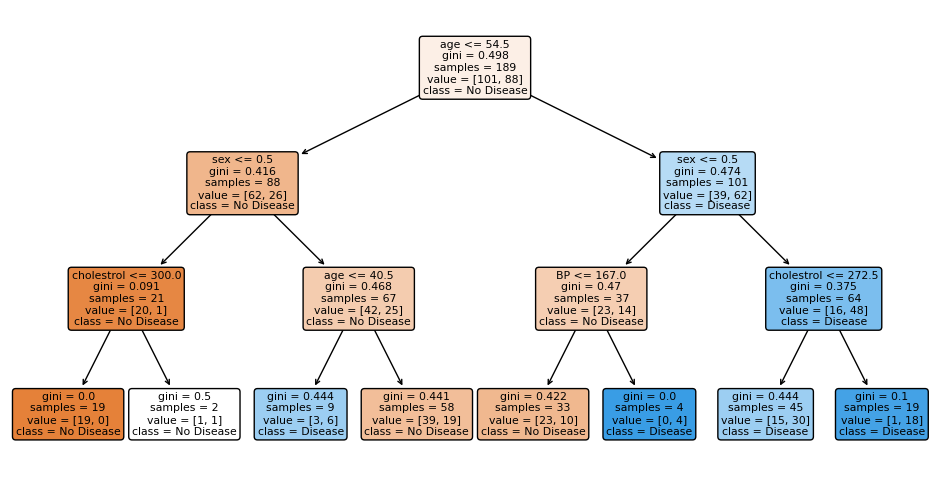

In [19]:
from sklearn import tree
plt.figure(figsize=(12,6))
tree.plot_tree(dt,filled=True,feature_names=X.columns,class_names=['No Disease','Disease'],rounded=True)
plt.show()

In [20]:
##Evaluating the model performance of the test set
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y_train,y_train_pred))
confusion_matrix(y_train,y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [22]:
print("Test set performance")
print(accuracy_score(y_test,y_test_pred))
confusion_matrix(y_test,y_test_pred)

Test set performance
0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)

### Create helper functions to evaluate the model performance and create graph for the dt

In [38]:
def get_dt_graph(model):
    from sklearn import tree
    plt.figure(figsize=(12,8))
    tree.plot_tree(model,filled=True,feature_names=X.columns,class_names=['No Disease','Disease'],rounded=True)
    plt.show(block=False)

In [33]:
def evaluate_model(dt_classifier):
    print("Train set performance")
    print(accuracy_score(y_train,dt_classifier.predict(X_train)))
    print(confusion_matrix(y_train,dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test set performance")
    print(accuracy_score(y_test,dt_classifier.predict(X_test)))
    print(confusion_matrix(y_test,dt_classifier.predict(X_test)))

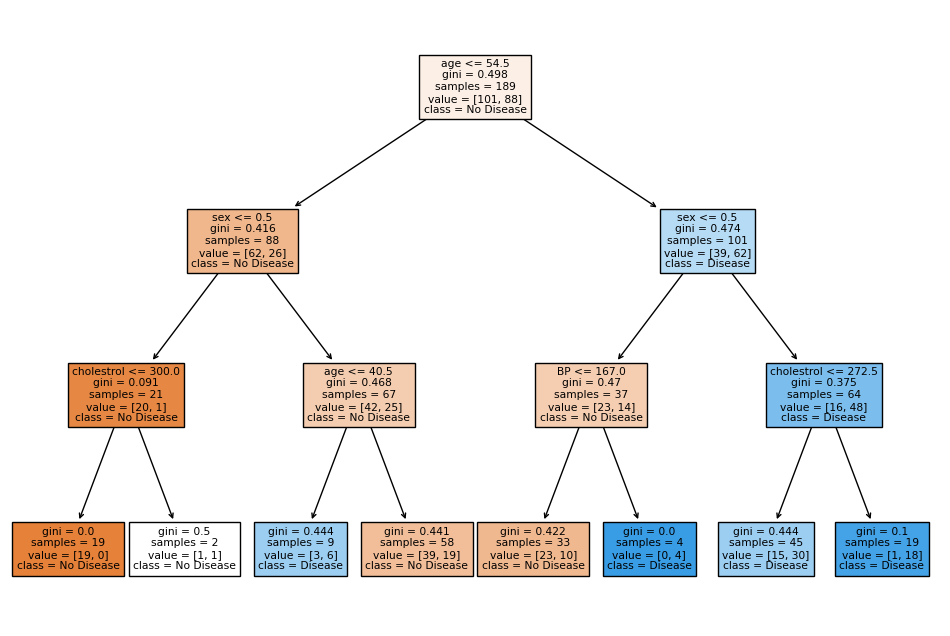

In [28]:
get_dt_graph(dt)

In [26]:
evaluate_model(dt)

Train set performance
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test set performance
0.6049382716049383
[[35 14]
 [18 14]]


In [29]:
#Decision tree without any hyperparameter settings
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

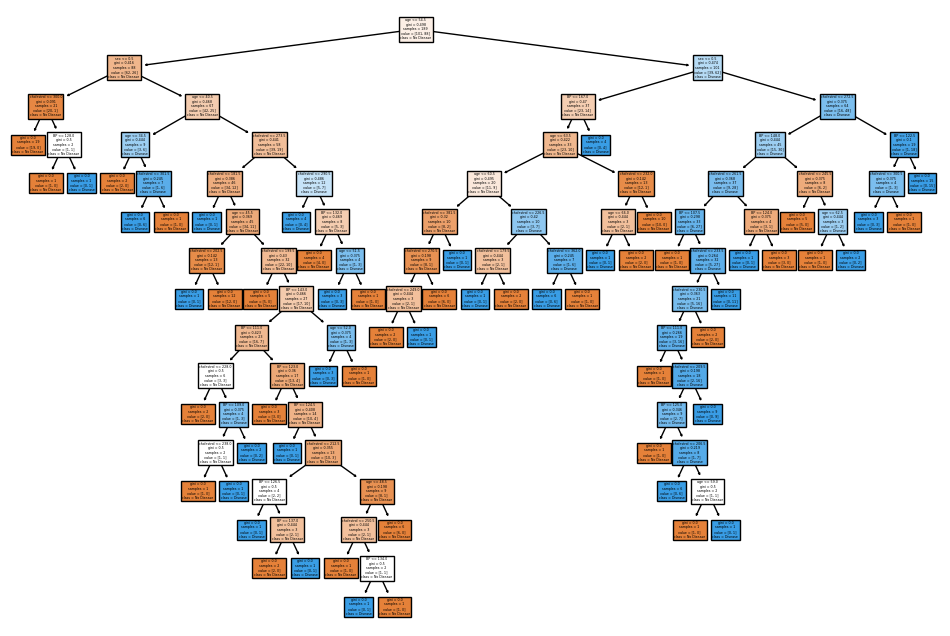

In [30]:
#visualize the tree
get_dt_graph(dt_default)

In [31]:
#model performance
evaluate_model(dt_default)

Train set performance
1.0
[[101   0]
 [  0  88]]
--------------------------------------------------
Test set performance
0.6296296296296297
[[31 18]
 [12 20]]


- Clearly this is an overfitted model.

### Controlling the depth of the tree

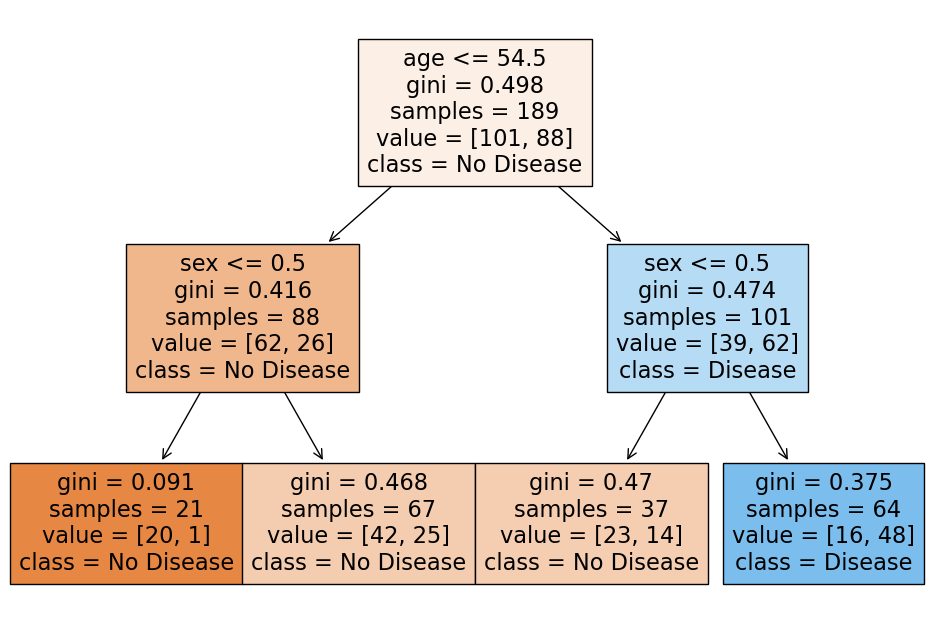

Train set performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test set performance
0.6419753086419753
[[38 11]
 [18 14]]


In [34]:
dt_depth = DecisionTreeClassifier(max_depth=2,random_state=42)
dt_depth.fit(X_train,y_train)
get_dt_graph(dt_depth)
evaluate_model(dt_depth)

### Specifying the minimum samples before split

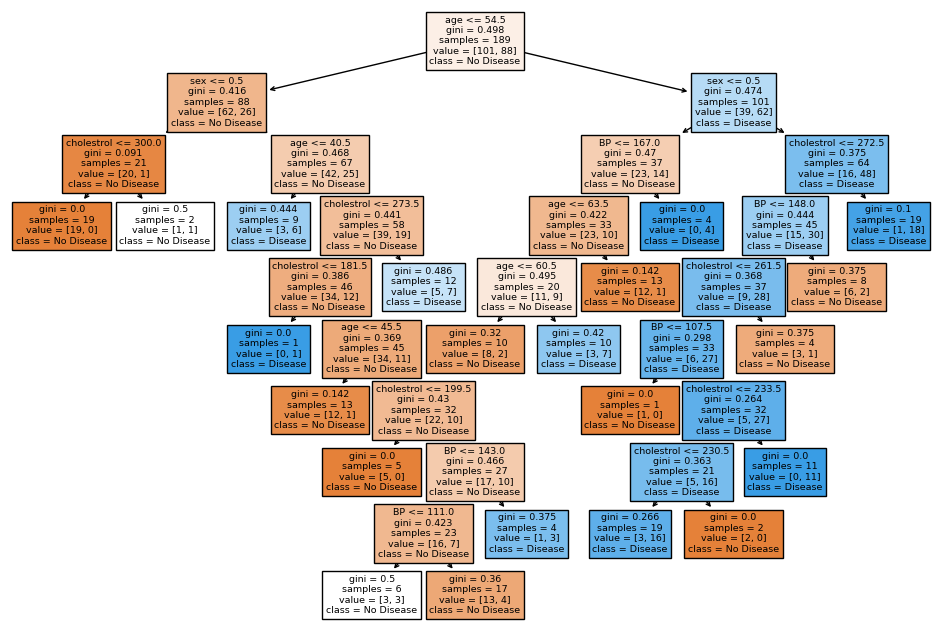

Train set performance
0.8359788359788359
[[85 16]
 [15 73]]
--------------------------------------------------
Test set performance
0.6419753086419753
[[32 17]
 [12 20]]


In [35]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20,random_state=42)
dt_min_split.fit(X_train,y_train)
get_dt_graph(dt_min_split)
evaluate_model(dt_min_split)

### Specifying the min samples in leaf node

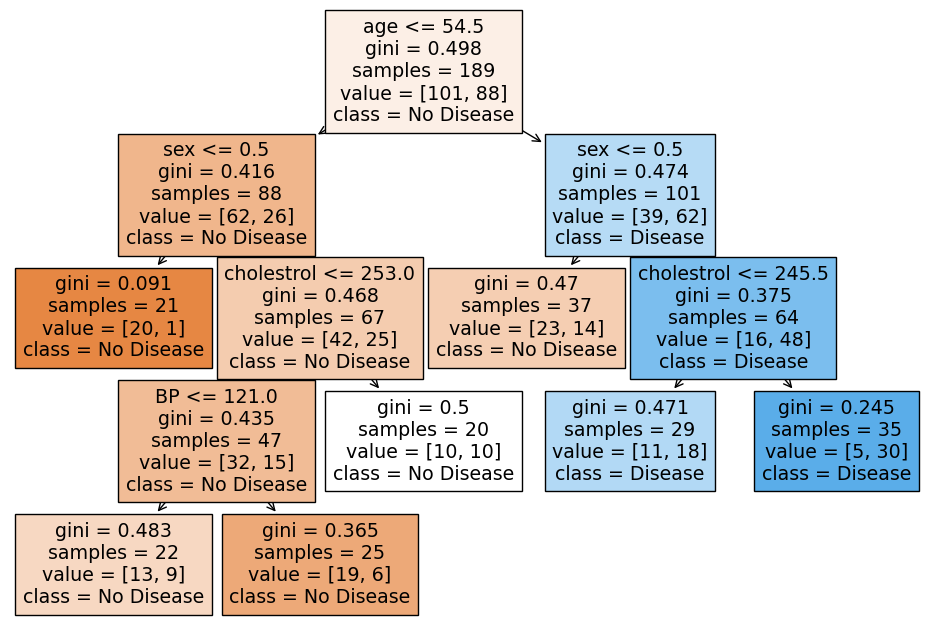

Train set performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test set performance
0.6419753086419753
[[38 11]
 [18 14]]


In [36]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20,random_state=42)
dt_min_leaf.fit(X_train,y_train)
get_dt_graph(dt_min_leaf)
evaluate_model(dt_min_leaf)

#### Using entropy instead of 'Gini' 

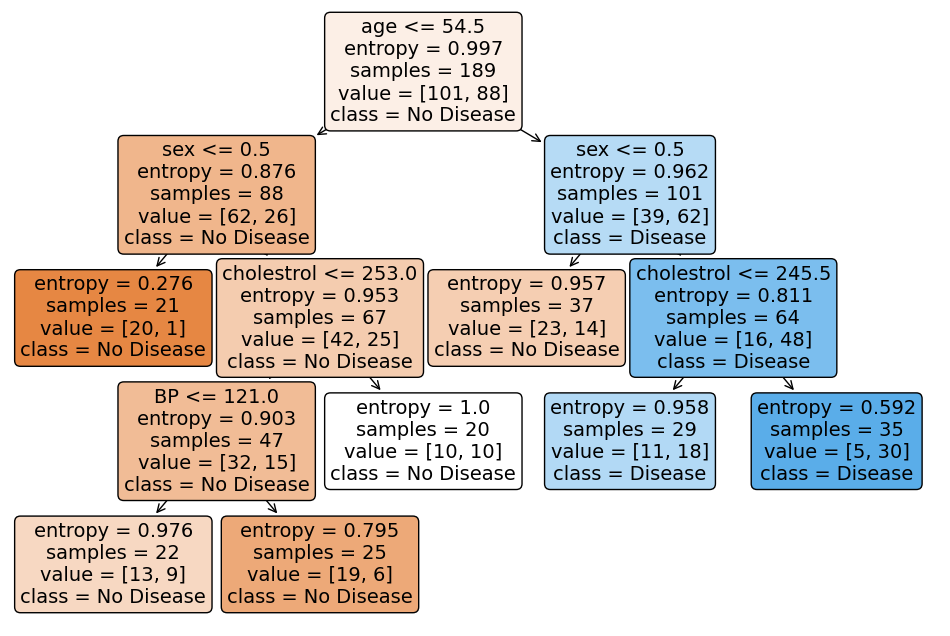

Train set performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test set performance
0.6419753086419753
[[38 11]
 [18 14]]


In [39]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20,random_state=42,criterion='entropy')
dt_min_leaf_entropy.fit(X_train,y_train)
get_dt_graph(dt_min_leaf_entropy)
evaluate_model(dt_min_leaf_entropy)

### Hyper-parameter tuning using GridSearch CV 

In [40]:
dt = DecisionTreeClassifier(random_state=42)

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
params = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'criterion':['gini','entropy']
}

In [43]:
grid_search = GridSearchCV(estimator=dt,
            param_grid=params,
            cv = 4,
             n_jobs=-1,
            verbose=1,
            scoring='accuracy')

In [44]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: total: 250 ms
Wall time: 15.7 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [45]:
print(grid_search.best_params_)
grid_search.best_score_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}


0.6669991134751774

In [48]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006989,0.004675,0.007978,0.005134,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
1,0.009974,0.003927,0.007978,0.005036,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
2,0.039395,0.053385,0.003490,0.000864,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20
3,0.016513,0.009712,0.009504,0.006706,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
4,0.005251,0.002185,0.003491,0.001654,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41


In [49]:
cv_df.shape

(50, 15)

In [50]:
cv_df.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.006510,0.003779,0.002244,0.000432,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
5,0.009118,0.004378,0.004624,0.003115,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,2
3,0.016513,0.009712,0.009504,0.006706,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
8,0.016649,0.008485,0.006868,0.005875,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
13,0.005251,0.002797,0.003242,0.001087,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3


In [51]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [52]:
#best estimator
dt_best = grid_search.best_estimator_

In [53]:
evaluate_model(dt_best)

Train set performance
0.7195767195767195
[[82 19]
 [34 54]]
--------------------------------------------------
Test set performance
0.6172839506172839
[[36 13]
 [18 14]]


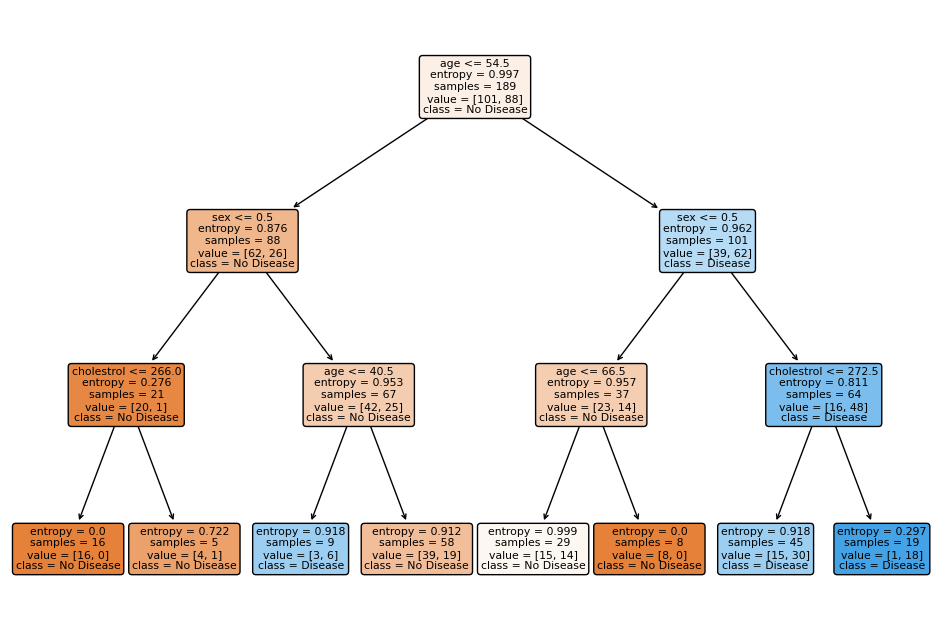

In [54]:
get_dt_graph(dt_best)

### Using Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
X_train.head()

,age,sex,BP,cholestrol
84,57,1,110,201
251,44,1,130,219
92,54,1,124,266
201,58,1,125,300
126,62,1,120,267


In [58]:
y_train.head()

84     0
251    0
92     1
201    1
126    1
Name: heart disease, dtype: int64

In [59]:
rf = RandomForestClassifier(random_state=42,max_depth=3,n_estimators=10)

In [60]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [62]:
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1914837113)]

In [63]:
sample_tree = rf.estimators_[4]

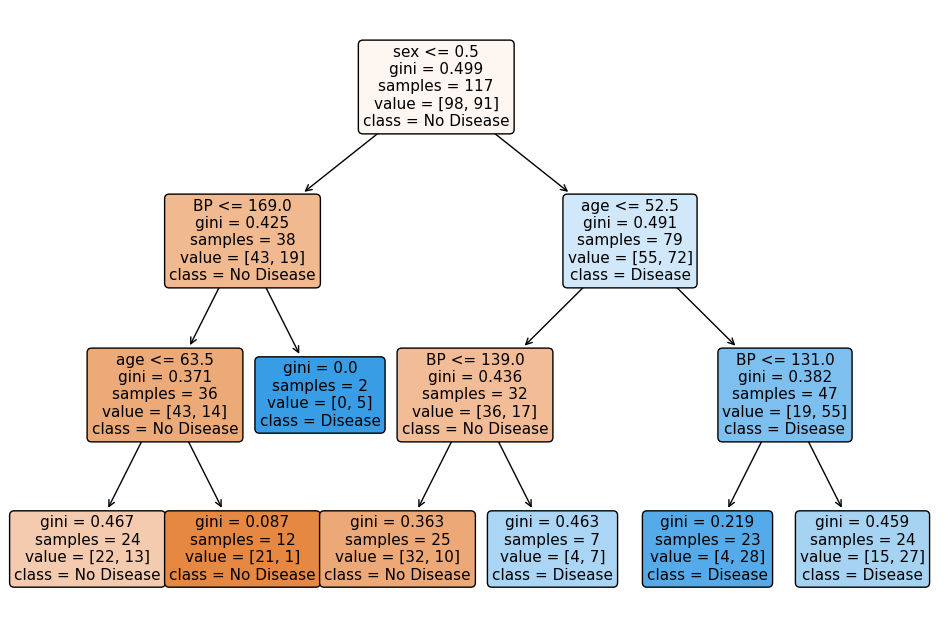

In [66]:
from sklearn import tree
get_dt_graph(sample_tree)

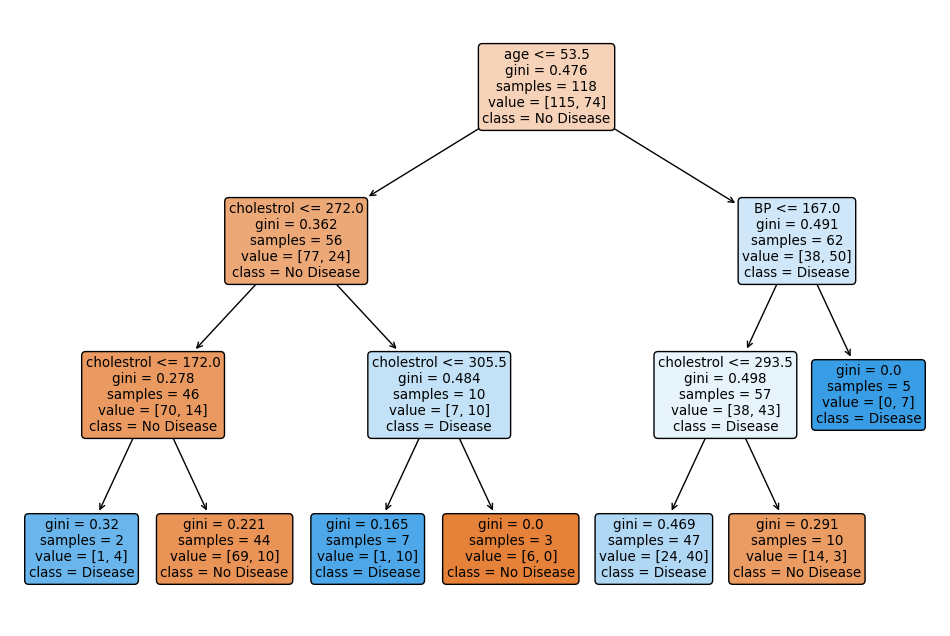

In [67]:
sample2 = rf.estimators_[2]
get_dt_graph(sample2)

- By comparing both the sample trees we see that the values are being split on the basis of random features.

### OOB Score

In [68]:
rf = RandomForestClassifier(random_state=42,max_depth=3,n_estimators=10,oob_score=True)

In [69]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [70]:
rf.oob_score_

0.6349206349206349

### Hyper-parameter tuning using GridSearchCV

In [71]:
classifier_rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [72]:
#Create the params
params = {
    'max_depth':[1,2,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'max_features':[2,3,4],
    'n_estimators':[10,30,50,100,200]
}

In [73]:
#Instantiate the grid search model
grid_search = GridSearchCV(param_grid=params,estimator = classifier_rf,cv = 4,n_jobs=-1,verbose=1,scoring='accuracy')

In [75]:
X_train.shape,X_test.shape

((189, 4), (81, 4))

In [77]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
CPU times: total: 3.84 s
Wall time: 3min 53s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [78]:
rf_best = grid_search.best_estimator_

In [79]:
rf_best

RandomForestClassifier(max_depth=1, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [82]:
grid_search.best_params_

{'max_depth': 1, 'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 30}

In [80]:
evaluate_model(rf_best)

Train set performance
0.6931216931216931
[[77 24]
 [34 54]]
--------------------------------------------------
Test set performance
0.654320987654321
[[35 14]
 [14 18]]


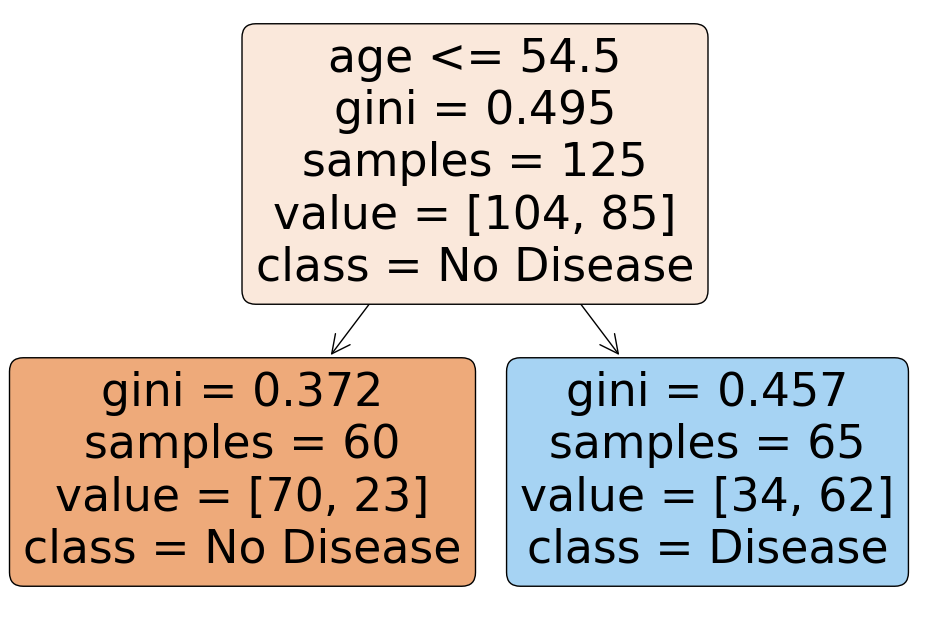

In [86]:
##sample1 
sample0 = grid_search.best_estimator_.estimators_[0]
get_dt_graph(sample0)

### Variable importance in Random Forest and Decision Trees

In [87]:
classifier_rf = RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)

In [88]:
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [89]:
classifier_rf.feature_importances_

array([0.37539743, 0.13780788, 0.20834585, 0.27844883])

In [90]:
X_train.columns

Index(['age', 'sex', 'BP', 'cholestrol'], dtype='object')

In [91]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [92]:
imp_df

,Varname,Imp
0,age,0.375397
1,sex,0.137808
2,BP,0.208346
3,cholestrol,0.278449


In [94]:
imp_df.sort_values(by="Imp",ascending=False)

,Varname,Imp
0,age,0.375397
3,cholestrol,0.278449
2,BP,0.208346
1,sex,0.137808
